# Analysing the 1D shock tube test

In [97]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import h5py
import matplotlib.pyplot as plt
import unyt as u

import richio
richio.plots.use_nice_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
import warnings

def _get_at_x(snap,
           quantity, 
           x, 
           xeps=0.05,
           qeps=1e-2):
    """
    Get quantity at x=indices, with coordinate error within xeps and quantity
    error within qeps.
    """
    try:
        indices = np.abs(snap.x - x * snap.x.units) <= xeps * snap.x.units
    except:
        indices = np.abs(snap.x - x) <= xeps * snap.x.units
    qxs = quantity[indices]

    qerr = (np.max(qxs) - np.min(qxs)) / np.min(qxs)
    if qerr > qeps: # percentage error
        warnings.warn(f"Error is {qerr}.")
    
    return np.mean(qxs)

In [99]:
!ls /home/hey4/rich_tde/data/raw/

ApptainerTDER1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenter
N1e6TDER1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenter
NewbuildTDER1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenter
SedovDissipation
ShockTubeN1e3IdealGas
ShockTubeN1e3OndrejEOS
ShockTubeN1e4IdealGas
ShockTubePL100PR1e-3N1e3
ShockTubePL10PR1e-2N1e3
ShockTubePL1e3PR1e-4N1e3
ShockTubePR1e-2N1e3IdealGas
ShockTubeSodN1e3Lbox2
etc
sedov2d
sedov2dMPI
sedov3d
sedov3dMPI


In [100]:
snap_dir = '/home/hey4/rich_tde/data/raw/ShockTubePL100PR1e-3N1e3'
# snap_dir = '/home/hey4/RICH-fwrk/build/'
!ls $snap_dir

snap_0.h5      snap_1400.h5   snap_200.h5    snap_2500.h5   snap_400.h5
snap_0.vtu     snap_1400.vtu  snap_200.vtu   snap_2500.vtu  snap_400.vtu
snap_100.h5    snap_1500.h5   snap_2000.h5   snap_2600.h5   snap_500.h5
snap_100.vtu   snap_1500.vtu  snap_2000.vtu  snap_2600.vtu  snap_500.vtu
snap_1000.h5   snap_1600.h5   snap_2100.h5   snap_2700.h5   snap_600.h5
snap_1000.vtu  snap_1600.vtu  snap_2100.vtu  snap_2700.vtu  snap_600.vtu
snap_1100.h5   snap_1700.h5   snap_2200.h5   snap_2800.h5   snap_700.h5
snap_1100.vtu  snap_1700.vtu  snap_2200.vtu  snap_2800.vtu  snap_700.vtu
snap_1200.h5   snap_1800.h5   snap_2300.h5   snap_2900.h5   snap_800.h5
snap_1200.vtu  snap_1800.vtu  snap_2300.vtu  snap_2900.vtu  snap_800.vtu
snap_1300.h5   snap_1900.h5   snap_2400.h5   snap_300.h5    snap_900.h5
snap_1300.vtu  snap_1900.vtu  snap_2400.vtu  snap_300.vtu   snap_900.vtu


In [101]:
# for snapnum in range(3000, 100000, 100):
#     file1 = snap_dir + f'snap_{snapnum}.pvtu'
#     file2 = snap_dir + f'snap_{snapnum}.h5'
#     dir = snap_dir + f'snap_{snapnum}'
#     !rm $file1
#     !rm $file2
#     !rm -r $dir

In [102]:
snap = richio.load(os.path.join(snap_dir, 'snap_2300.h5')) # 900

In [103]:
snap.info()

                                     RICH SNAPSHOT INFORMATION                                      

Snapshot Details                        
----------------------------------------------------------------------------------------------------


  Path                      : /home/hey4/rich_tde/data/raw/ShockTubePL100PR1e-3N1e3/snap_2300.h5
  Snapshot Number           : 2300
  Time                      : [0.55388092] code_time
  Box size                  : [-10.    -0.01  -0.01  10.     0.01   0.01] code_length
  Cycle                     : [2300.] dimensionless
  Number of Ranks           : 1

Available Fields                         [Unit System: RICH]
----------------------------------------------------------------------------------------------------
Field           Unit                                     Aliases
----------------------------------------------------------------------------------------------------
Box             code_length                              box_size, box, boxsize
CMx             code_length                              cm_x, center_of_mass_x
CMy             code_length                              cm_y, center_of_mass_y
CMz             code_length                              cm_z, center_of_mas

/zfsstore/user/hey4/rich_tde/richio/units.py:117: UserWarning: 'Eg_0' is in the data output but not used in the simulation.
  warnings.warn(f"'{key}' is in the data output but not used in the simulation.")


In [104]:
snap.time

unyt_array([0.55388092], 'code_time')

## The rho v P profiles

In [105]:
from rs import RiemannSolver
# Left State
rho_L = 1.0
vx_L = 0.0
P_L = 100

# Right State
rho_R = 0.125
vx_R = 0.0
P_R = 0.001

# ideal gas gamma
gamma = 5/3

# time
t = snap.time.value

# Riemann Solver
rs = RiemannSolver(rho_L, vx_L, P_L, rho_R, vx_R, P_R, gamma, t)
x, rho, vx, P = rs.solve()

x *= richio.units.system["length"]
rho *= richio.units.system["density"]
vx *= richio.units.system["velocity"]
P *= richio.units.system["pressure"]

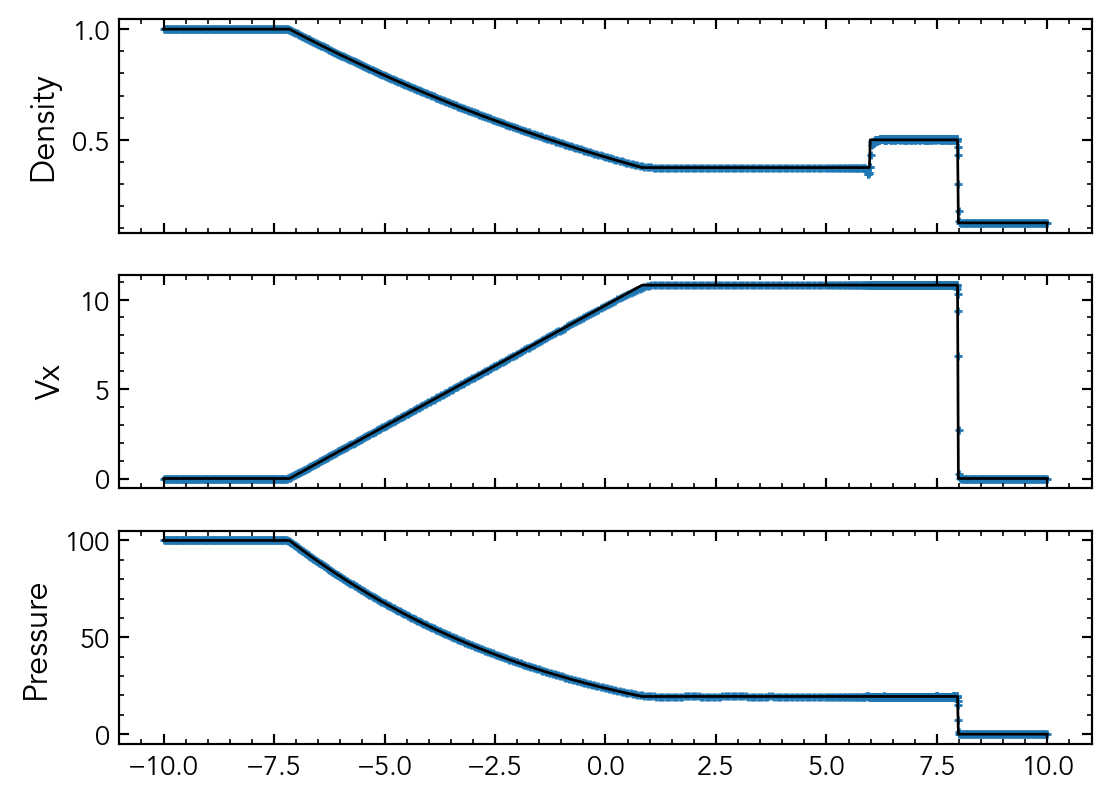

In [106]:
fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].plot(x, rho, color='k')
ax[0].scatter(snap.x, snap.density, marker='+',  s=10)
ax[0].set_ylabel('Density')

ax[1].plot(x, vx, color='k')
ax[1].scatter(snap.x, snap.velocity_x, marker='+',  s=10)
ax[1].set_ylabel('Vx')

ax[2].plot(x, P, color='k')
ax[2].scatter(snap.x, snap.P, marker='+',  s=10)
ax[2].set_ylabel('Pressure')

plt.show()

## Dissipation
Sackur–Tetrode equation: entropy of an monatomic ideal gas ($\gamma = 5/3$)
$$
\frac{S}{k_{\rm B} N} = \ln
\left[ \frac{V}{N} \left(\frac{4\pi m}{3h^2}\frac{U}{N}\right)^{3/2}\right]+
{\frac{5}{2}}
$$
Specific entropy expressed in terms of pressure and density
$$
s = \frac{k_B}{m_H} \left\{ \ln\left[m_H^4 \left(\frac{2\pi}{h^2}\right)^{3/2}\frac{P}{\rho^{\gamma}}\right] + \frac{5}{2} \right\}
$$

In [107]:
def dp2s(rho, p):
    """
    Using the Sackur-Tetrode equation to calculate specific entropy of a
    gamma=5/3 ideal gas, given pressure and density.
    """
    gamma = 5/3
    sie = p / (rho * (gamma - 1)) # specific internal energy
    s = 1 / u.mh * u.kb * (np.log(u.mh / rho * ((4*np.pi*u.mh**2*sie)/(3*u.h**2))**(3/2)) + 5/2) 
    return s

In [108]:
# Specific entropy of the cells
s = dp2s(snap.rho, snap.P)
s = (s * snap.density / snap.density).in_base('rich') # unit hack

# Specific entropy of the analytical solution
s_exact = dp2s(rho, P)
# Create new quantity with rich registry
s_exact = u.unyt_array(
    s_exact.value,  # or s_exact.value
    s_exact.units,
    registry=richio.units.registry
)
s_exact = s_exact.in_base('rich')

### Measure sh speed

In [109]:
_xs = []
_ts = []
for file in os.listdir(snap_dir):
    if file.endswith('h5'):
        _snap = richio.load(os.path.join(snap_dir, file))
        i_shfront = np.argmax(_snap.dissipation) # sh front as the maximum of dissipation, good enough for sod sh; be careful in other setups
        _x = _snap.x[i_shfront]
        _t = _snap.time[0]

        _xs.append(_x)
        _ts.append(_t)

_xs = u.unyt_array(_xs)
_ts = u.unyt_array(_ts)

14.382093984478422 code_length/code_time 0.011975913473329682 code_length


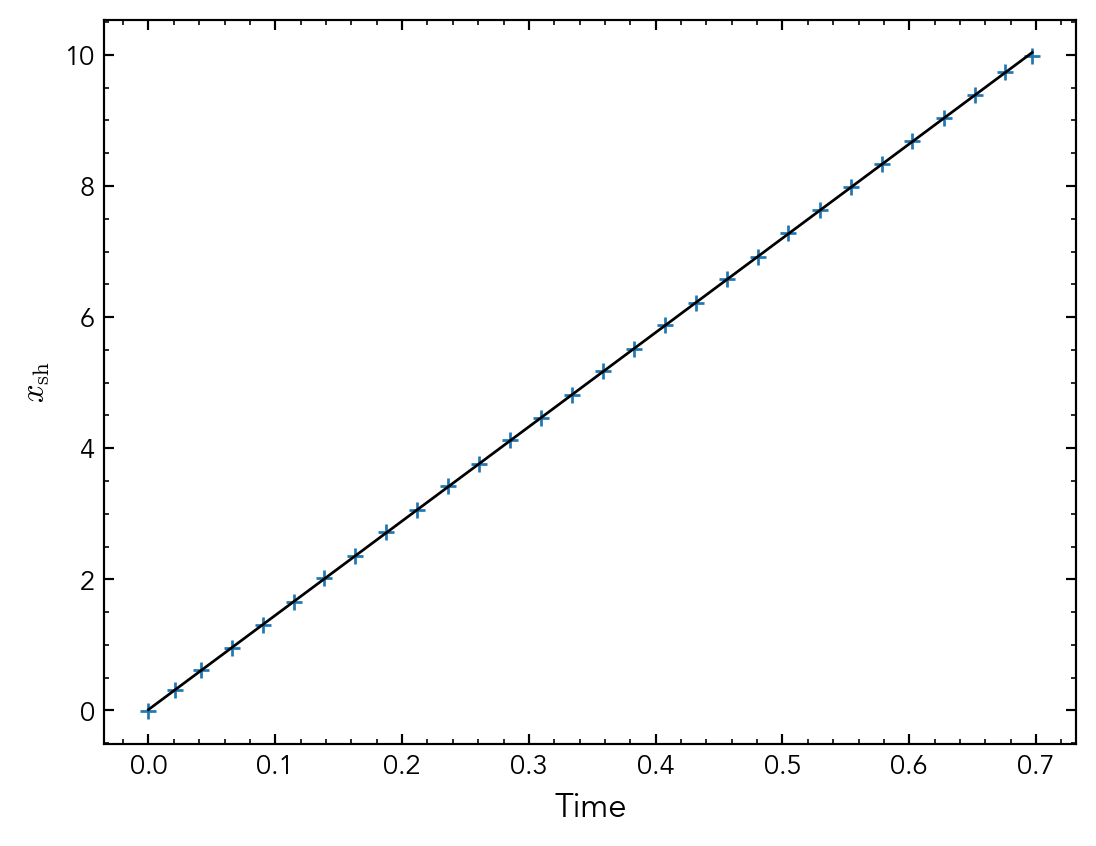

In [110]:
v_sh, b = np.polyfit(_ts.value, _xs.value, 1)
v_sh *= richio.units.lscale / richio.units.tscale
b *= richio.units.lscale
print(v_sh, b)

plt.scatter(_ts, _xs, marker='+')
_t = np.linspace(np.min(_ts), np.max(_ts), 100, True)
plt.plot(_t, _t*v_sh + b, color='k')
plt.xlabel('Time')
plt.ylabel(r'$x_\mathrm{sh}$')
plt.show()

In [111]:
np.sum(_ts < _ts[np.argmax(_xs)])

np.int64(29)

### Verify jump conditions
$$
\frac{\rho_1}{\rho_2} = \frac{\gamma - 1}{\gamma + 1} + \frac{2}{(\gamma + 1) M^2}
$$
$$
\frac{P_2}{P_1} = \frac{2\gamma M^2}{\gamma + 1} - \frac{\gamma - 1}{\gamma + 1}
$$
$$
\frac{u_2}{u_1} = \frac{P_2}{P_1}\frac{\rho_1}{\rho_2}
$$

In [112]:
# Get sh front position
i_sh = np.argmax(snap.dissipation)
x_sh = snap.x[i_sh]

# Near the neighbor of the sh front
x1 = x_sh * 1.1  # upstream
x2 = x_sh * 0.9  # downstream

In [113]:
# Temperature
T = snap.P / snap.density * u.mh / u.kb

# Analytical solution of temperature
T_exact = P / rho * u.mh / u.kb

In [114]:
T1 = _get_at_x(snap, T, x=x1)
T2 = _get_at_x(snap, T, x=x2)
s1 = _get_at_x(snap, s, x=x1)
s2 = _get_at_x(snap, s, x=x2)
u1 = _get_at_x(snap, snap.sie, x=x1)
u2 = _get_at_x(snap, snap.sie, x=x2)
rho1 = _get_at_x(snap, snap.rho, x=x1)
rho2 = _get_at_x(snap, snap.rho, x=x2)
P1 = _get_at_x(snap, snap.P, x=x1)
P2 = _get_at_x(snap, snap.P, x=x2)
v1_lab = _get_at_x(snap, snap.vx, x=x1) # lab frame
v2_lab = _get_at_x(snap, snap.vx, x=x2)
v1_sh = v_sh - v1_lab
v2_sh = v_sh - v2_lab

In [115]:
# Mach number
P1 = _get_at_x(snap, snap.P, x=x1)
M = np.sqrt(rho1 * v_sh**2 * 3 / (5 * P1)) # M = v_sh / c_1
print("The Mach number of the sh is", M)

The Mach number of the sh is 124.55258750173671 dimensionless


In [116]:
ga = 5/3
rho1_to_rho2 = (ga - 1)/(ga + 1) + 2/(ga + 1)/M**2
P2_to_P1 = (2*ga*M**2)/(ga + 1) - (ga - 1)/(ga + 1)

In [117]:
# This is mostly a sanity check
# Because the riemann solver (exact) solution gives the jump condition exactly
# And we see RICH matches the riemann solver solution very well
print(f"rho1/rho2 analytically from the Mach number: {rho1_to_rho2}")
print(f"rho1/rho2 actually in the sim: {rho1 / rho2}\n")
print(f"P2/P1 from the Mach number: {P2_to_P1}")
print(f"P2/P1 actually in the sim: {P2 / P1}")

rho1/rho2 analytically from the Mach number: 0.25004834546648247 dimensionless
rho1/rho2 actually in the sim: 0.24893046315992248 dimensionless

P2/P1 from the Mach number: 19391.433816722223 dimensionless
P2/P1 actually in the sim: 19453.149812020023 dimensionless


In [118]:
print(f"v2/v1 which should be equal to rho1/rho2 {v2_sh / v1_sh}")

v2/v1 which should be equal to rho1/rho2 0.2483158885199786 dimensionless


In [119]:
# K(s) factor changes across shock
P1/rho1**gamma, P2/rho2**gamma

(unyt_quantity(0.032, 'code_length**4/(code_mass**(2/3)*code_time**2)'),
 unyt_quantity(61.32016597, 'code_length**4/(code_mass**(2/3)*code_time**2)'))

### Comparison 1: calculate entropy jump
$$
\mathrm{Diss}\,[\mathrm{energy/time}] = T_1 (s_2 v_2 - s_1 v_1) \rho_1 A
$$
(Only when reversible dQ=TdS?)

In [120]:
# Total dissipation rate (dissipation rate at sh front as well)
diss = snap.dissipation * snap.volume
total_diss = np.sum(diss)
print(f"The total dissipation rate is {total_diss}")

i_sh = (snap.x > x2) & (snap.x < x1)
diss_sh = np.sum(diss[i_sh])
print(f"Dissipation rate across the sh front is {diss_sh}")

The total dissipation rate is 0.022167061027326795 code_length**2*code_mass/code_time**3
Dissipation rate across the sh front is 0.022166602996284045 code_length**2*code_mass/code_time**3


In [121]:
# Cross section
A = (snap.box_size[4] - snap.box_size[1]) * (snap.box_size[5] - snap.box_size[2])
print(f'The cross section is: {A}')

The cross section is: 0.0004 code_length**2


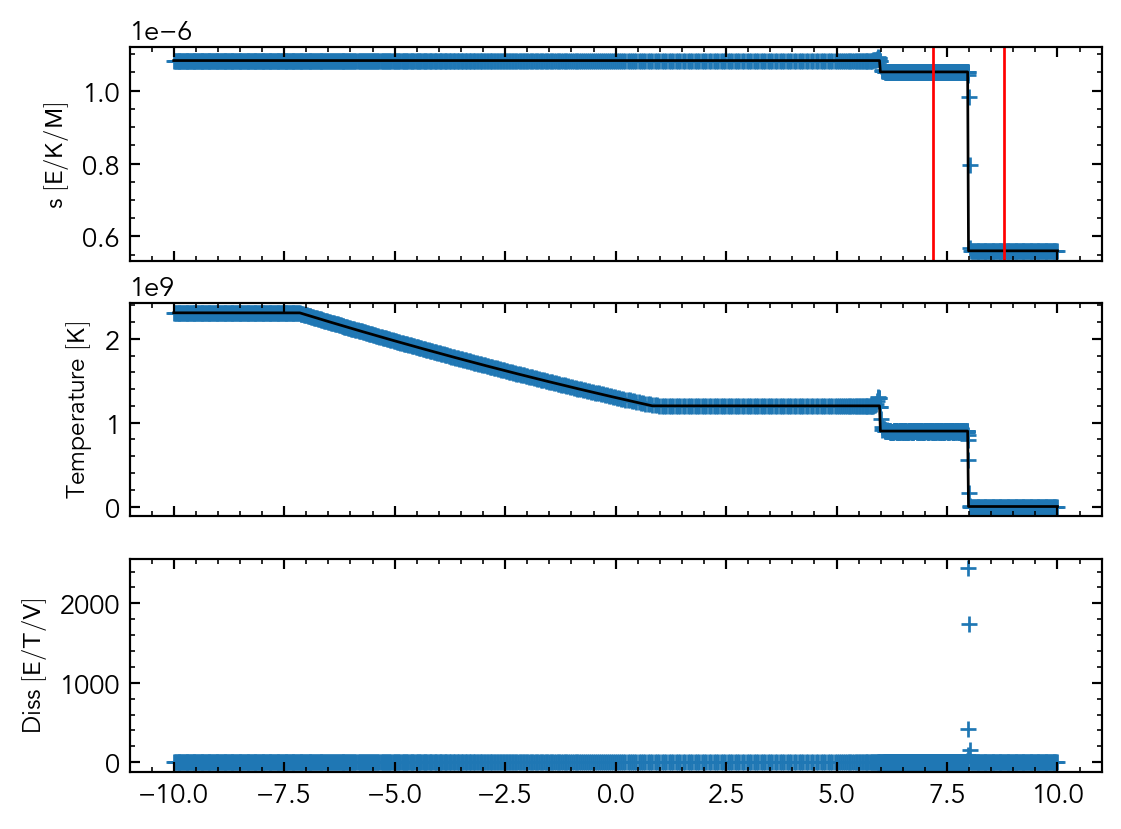

In [122]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].scatter(snap.x, s, marker='+')
ax[0].plot(x, s_exact, color='k')
ax[0].set_ylabel(r's $\mathsf{[E/K/M]}$', fontsize=9)

ax[0].axvline(x1.value, color='r')
ax[0].axvline(x2.value, color='r')

ax[1].scatter(snap.x, T, marker='+')
ax[1].plot(x, T_exact, color='k')
ax[1].set_ylabel(r'Temperature $\mathsf{[K]}$', fontsize=9)

ax[2].scatter(snap.x, snap.dissipation, marker='+')
ax[2].set_ylabel(r'Diss $\mathsf{[E/T/V]}$', fontsize=9)

plt.show()

In [123]:
# T_1 (s_2 - s_1)
diss_sjump = T1 * (s2 * v2_sh * rho2 - s1 * v1_sh * rho1) * A
print(f"Dissipation rate across the shock front, as seen from entropy jump {diss_sjump}")

Dissipation rate across the shock front, as seen from entropy jump 6.487600639432931e-05 code_length**2*code_mass/code_time**3


In [124]:
diss_sh / diss_sjump

unyt_quantity(341.67644139, '(dimensionless)')

### Comparison 2
$$
\mathrm{Diss}\,\mathrm{[E/T]} = (u_2 - u_1)\rho_1 v_\mathrm{sh} A
$$
subscript 1 for upstream, 2 for downstream. (Extremely strong shock)

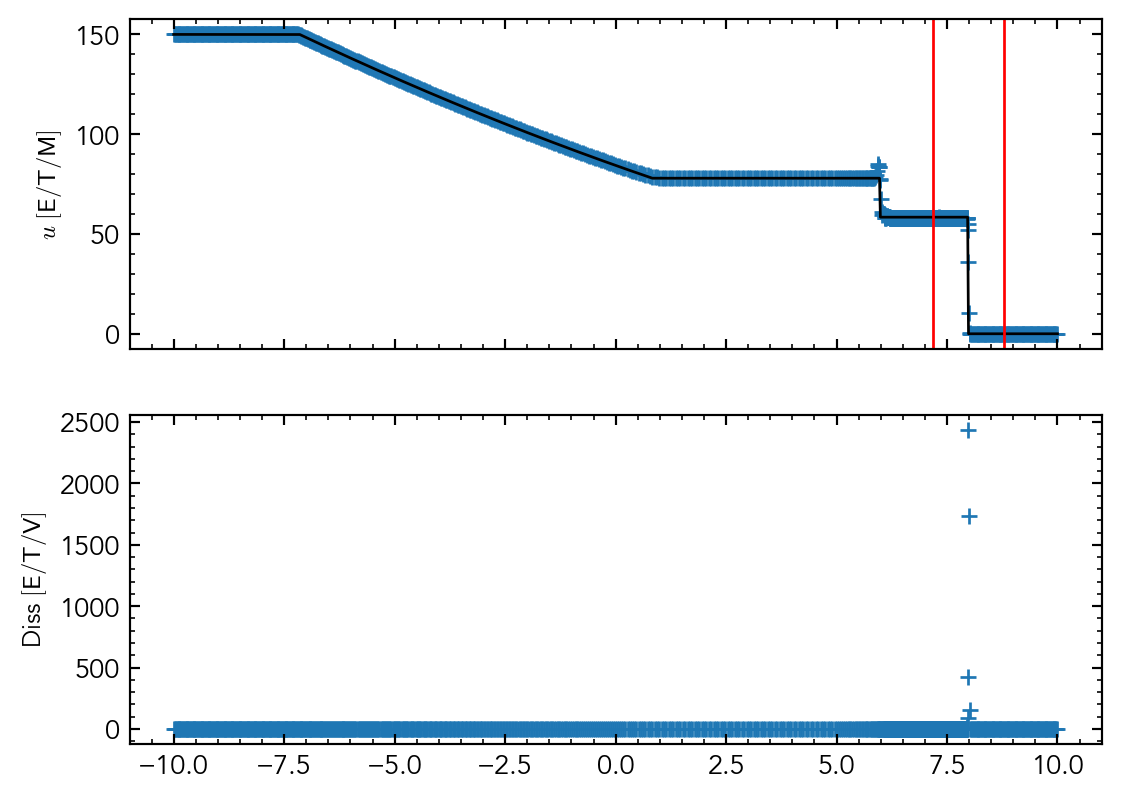

In [125]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].scatter(x=snap.x, y=snap.sie, marker='+')
ax[0].plot(x, P/rho*(3/2), color='k')
ax[0].set_ylabel(r'$u$ $\mathsf{[E/T/M]}$', fontsize=9)
ax[0].axvline(x1.value, color='r')
ax[0].axvline(x2.value, color='r')

ax[1].scatter(snap.x, snap.dissipation, marker='+')
ax[1].set_ylabel(r'Diss $\mathsf{[E/T/V]}$', fontsize=9)

plt.show()

In [126]:
# Total dissipation rate diagnostic
# diss_ie = (u2 - u1) * rho1 * v_sh * A
diss_ie = (u2 * rho2 * v2_sh - u1 * rho1 * v1_sh) * A # (u2 - u1)* rho1 * v_sh * A
print(diss_ie)

0.04167526519695575 code_length**2*code_mass/code_time**3


In [127]:
(u2 - u1)* rho1 * v_sh * A # by rho2 v2 = rho1 v1 and v1 ~ v_sh

unyt_quantity(0.04177843, 'code_length**2*code_mass/code_time**3')

In [128]:
diss_ie/diss_sh

unyt_quantity(1.88009255, '(dimensionless)')

### Comparison 3: Schaal+15, 16; Ryu+03
$$
\begin{gather}
E_\mathrm{diss} = \frac{1}{2} \rho_1 v_\mathrm{sh}^3 A \delta (M)
\\
\delta(M) = \frac{2}{\gamma(\gamma - 1)M^2 R} \left[\frac{2\gamma M^2 - (\gamma - 1)}{\gamma + 1} - R^\gamma\right]
\\
R = \frac{\rho_2}{\rho_1}
\end{gather}
$$

In [129]:
R = rho2/rho1
deltaM = 2/(gamma*(gamma - 1) * M**2 * R) * ((2*gamma*M**2 - (gamma - 1))/(gamma + 1) - R**gamma)
diss_schaal = 1/2*rho1*v_sh**3*A*deltaM
print(diss_schaal)

0.041632637436598785 code_length**2*code_mass/code_time**3


In [130]:
deltaM

unyt_quantity(0.55979311, '(dimensionless)')

In [131]:
print('RICH:', diss_sh, '\n', 'Entropy jump:', diss_sjump, '\n', 'Schaal+16:', diss_schaal, '\n', 'Internal energy jump:', diss_ie)

RICH: 0.022166602996284045 code_length**2*code_mass/code_time**3 
 Entropy jump: 6.487600639432931e-05 code_length**2*code_mass/code_time**3 
 Schaal+16: 0.041632637436598785 code_length**2*code_mass/code_time**3 
 Internal energy jump: 0.04167526519695575 code_length**2*code_mass/code_time**3


In [ ]:
(u2 * rho2 - u1 * (rho2/rho1)**ga * rho1) * v2_sh * A # Also Schaal, without the delta(M) parametrisation, just utot + pdV

unyt_quantity(0.04166214, 'code_length**2*code_mass/code_time**3')

In [ ]:
(u2 * rho2 - u1 * (rho2/rho1)**ga * rho1) * v2_sh * A - diss_sjump # guess: dU + pdV - TdS?

unyt_quantity(0.04159727, 'code_length**2*code_mass/code_time**3')

### Issue: RICH dissipation is a factor of two smaller
Clues:
1. Difference increases with Mach number and approaches ~1/2.
2. Not from the piece-wise constant integration I did, otherwise it would be a factor of two over estimation instead of under.
3. May still have to do with the numerical scheme and the accuracy decreases with sharper shock front? If this is the case then it has no affect on real simulation because there the shock fronts are thicker.
4. If from some systematics then see if we can make it better? Maybe a better estimation in calculating $\int P \partial_i v^i dV$ and $\int v^i \partial_i P dV$ over cell?
5. In practice Schaal+15,16 methods are more complicated to implement (the more physics the more difficult to get shock front and pre, post shock value, need to tune (modify) for new physics you put in specifically, also need substantial modification to do non-ideal gas) and might give you more than a factor of two error in real sim. 

In [134]:
# The below positions are for
# snap_dir = '/home/hey4/rich_tde/data/raw/ShockTubePL100PR1e-3N1e3'
# snap = richio.load(os.path.join(snap_dir, 'snap_2300.h5')) # 900

In [135]:
#trying sth
i_maxdiss = np.argmax(snap.dissipation)
print(snap.volume[i_maxdiss]/A)
print(np.mean(snap.volume/A))

0.00961751625128612 code_length
0.019999999999999983 code_length


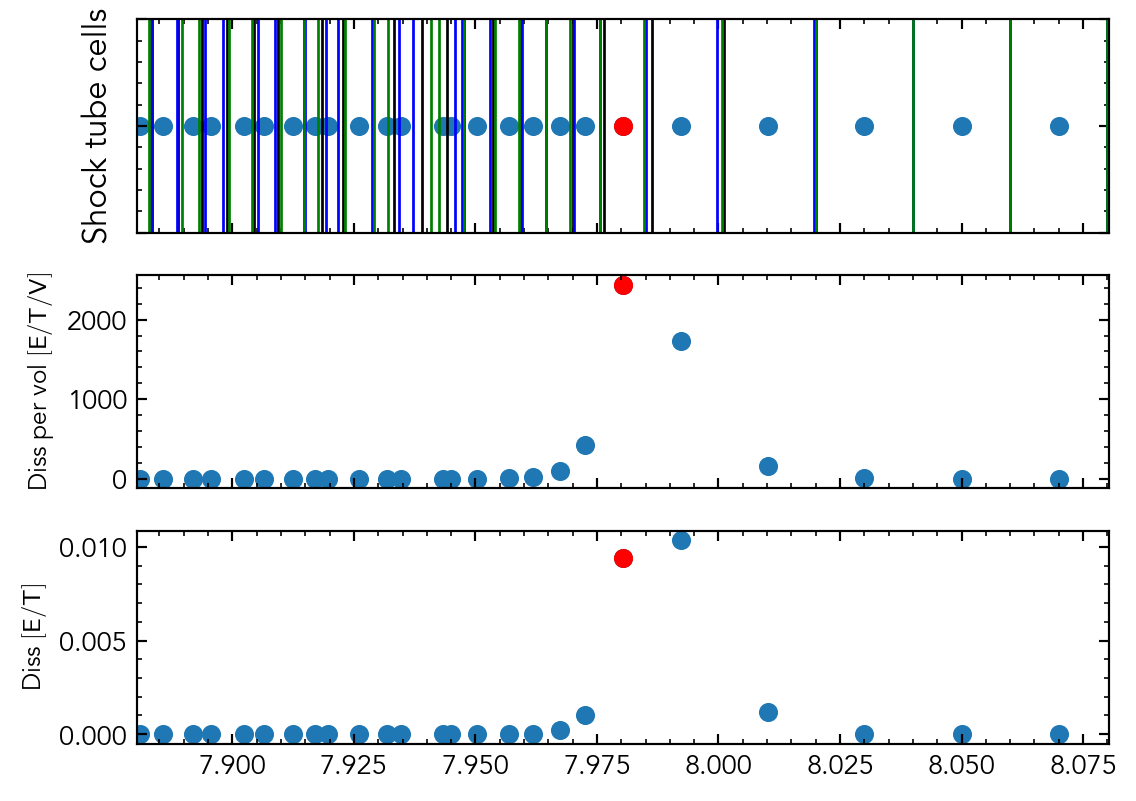

In [136]:
# Looking at the shock front
fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].scatter(snap.x, np.ones_like(snap.x))
ax[0].scatter(snap.x[i_maxdiss], 1, color='r')

# Voronoi lines
i_sortx = np.argsort(snap.x)
x_sorted = snap.x[i_sortx]
ax[0].vlines((x_sorted[1:] + x_sorted[:-1])/2, ymin=0, ymax=2, color='k')

# Volume splitting
lcell = snap.volume / A
ax[0].vlines(snap.x + lcell/2, ymin=0, ymax=2, color='b')
ax[0].vlines(snap.x - lcell/2, ymin=0, ymax=2, color='g')

ax[0].set_ylabel(r'Shock tube cells')
ax[0].set_ylim(0, 2)
ax[0].set_yticklabels('')

ax[1].scatter(snap.x, snap.dissipation)
ax[1].scatter(snap.x[i_maxdiss], snap.dissipation[i_maxdiss], color='r')
ax[1].set_ylabel(r'Diss per vol $\mathsf{[E/T/V]}$', fontsize=9)

ax[2].scatter(snap.x, snap.dissipation * snap.volume)
ax[2].scatter(snap.x[i_maxdiss], snap.dissipation[i_maxdiss] * snap.volume[i_maxdiss], color='r')
ax[2].set_ylabel(r'Diss $\mathsf{[E/T]}$', fontsize=9)

plt.xlim(snap.x[i_maxdiss].value-0.1, snap.x[i_maxdiss].value+0.1)

plt.show()